**importing the required libraries**

In [167]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from highlight_text import fig_text
import mplsoccer

**Getting the input from the user and parsing the content**

In [168]:
player_id = str(input("Please, Enter player id: "))
url = 'https://understat.com/player/'+ player_id
r = requests.get(url)
soup = BeautifulSoup(r.content, 'lxml')
scripts = soup.find_all('script')
player_name = soup.find_all('div',{"class":"header-wrapper"})
player_name = player_name[0].text.strip()
print(player_name, '\t', url)

Lionel Messi 	 https://understat.com/player/2097


In [169]:
strings = scripts[1].string
ind_start = strings.index("('")+2
ind_end = strings.index("')")
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
json_data = json.loads(json_data)
json_data.keys()

dict_keys(['season', 'position', 'situation', 'shotZones', 'shotTypes'])

# **Season --> Situation**

In [170]:
for x in list(json_data['situation'].keys()):
    print('\n')
    print(x)
    print(json_data['situation'][x].keys())




2014
dict_keys(['OpenPlay', 'DirectFreekick', 'FromCorner', 'Penalty', 'SetPiece'])


2015
dict_keys(['OpenPlay', 'DirectFreekick', 'Penalty', 'FromCorner', 'SetPiece'])


2016
dict_keys(['OpenPlay', 'DirectFreekick', 'FromCorner', 'Penalty', 'SetPiece'])


2017
dict_keys(['OpenPlay', 'DirectFreekick', 'FromCorner', 'Penalty', 'SetPiece'])


2018
dict_keys(['OpenPlay', 'DirectFreekick', 'FromCorner', 'Penalty', 'SetPiece'])


2019
dict_keys(['OpenPlay', 'DirectFreekick', 'Penalty', 'FromCorner', 'SetPiece'])


2020
dict_keys(['OpenPlay', 'DirectFreekick', 'FromCorner', 'Penalty', 'SetPiece'])


2021
dict_keys(['OpenPlay', 'DirectFreekick', 'FromCorner', 'SetPiece'])


2022
dict_keys(['OpenPlay', 'DirectFreekick', 'FromCorner'])


# **Season --> Shot Zones**

In [171]:
for x in list(json_data['shotZones'].keys()):
    print('\n')
    print(x)
    print(json_data['shotZones'][x].keys())




2014
dict_keys(['shotOboxTotal', 'shotPenaltyArea', 'shotSixYardBox'])


2015
dict_keys(['shotOboxTotal', 'shotPenaltyArea', 'shotSixYardBox'])


2016
dict_keys(['shotOboxTotal', 'shotPenaltyArea', 'shotSixYardBox'])


2017
dict_keys(['shotOboxTotal', 'shotPenaltyArea', 'shotSixYardBox'])


2018
dict_keys(['shotOboxTotal', 'shotPenaltyArea', 'shotSixYardBox'])


2019
dict_keys(['shotOboxTotal', 'shotPenaltyArea', 'shotSixYardBox'])


2020
dict_keys(['shotOboxTotal', 'shotPenaltyArea', 'shotSixYardBox'])


2021
dict_keys(['shotOboxTotal', 'shotPenaltyArea', 'shotSixYardBox'])


2022
dict_keys(['shotOboxTotal', 'shotPenaltyArea'])


# **Season --> Shot Types**

In [172]:
for x in list(json_data['shotTypes'].keys()):
    print('\n')
    print(x)
    print(json_data['shotTypes'][x].keys())




2014
dict_keys(['LeftFoot', 'RightFoot', 'Head', 'OtherBodyPart'])


2015
dict_keys(['LeftFoot', 'RightFoot', 'Head', 'OtherBodyPart'])


2016
dict_keys(['LeftFoot', 'RightFoot', 'Head'])


2017
dict_keys(['LeftFoot', 'RightFoot', 'Head'])


2018
dict_keys(['LeftFoot', 'RightFoot', 'Head'])


2019
dict_keys(['LeftFoot', 'RightFoot', 'Head'])


2020
dict_keys(['LeftFoot', 'RightFoot', 'Head', 'OtherBodyPart'])


2021
dict_keys(['LeftFoot', 'RightFoot', 'Head'])


2022
dict_keys(['LeftFoot', 'Head', 'RightFoot'])


# **Season stats**

In [173]:
def SeasonStats():
    
    games = []
    goals = []
    shots = []
    mins = []
    xg = []
    assists = []
    xa = []
    season = []
    team = []
    yellow = []
    red = []
    np_g = []
    np_xg = []
    xg_chain = []
    xg_buildup = []

    strings = scripts[1].string
    ind_start = strings.index("('")+2
    ind_end = strings.index("')")
    json_data = strings[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    json_data = json.loads(json_data)

    for x in json_data["season"]:
        games.append(int(x["games"]))
        goals.append(int(x["goals"]))
        shots.append(int(x["shots"]))
        xg.append(float(x["xG"]))
        assists.append(int(x["assists"]))
        xa.append(float(x["xA"]))
        season.append(x["season"])
        team.append(x["team"])
        yellow.append(int(x["yellow"]))
        red.append(x["red"])
        np_g.append(x["npg"])
        np_xg.append(x["npxG"])
        xg_chain.append(x["xGChain"])
        xg_buildup.append(x["xGBuildup"])
        mins.append(int(x["time"]))

    df = pd.DataFrame({ 'Season': season, 'Team': team, 'Mins': mins,'App.': games,
                    'Goals': goals, 'Shots': shots, 'xG': xg, 'Assists': assists, 
                'xA': xa, 'Yellow cards': yellow, 'Red cards': red, 'npG': np_g,
                    'npxG': np_xg, 'xGChain': xg_chain, 'xGBuildup': xg_buildup})
    for col in ["xG","xA",'npxG','xGChain','xGBuildup']:
        df[col] = df[col].astype(float).round(3)
    season = input("Please, Enter season: ")
    display(df.loc[df.Season == season].reset_index(drop=True))

SeasonStats()

,Season,Team,Mins,App.,Goals,Shots,xG,Assists,xA,Yellow cards,Red cards,npG,npxG,xGChain,xGBuildup


# **Shots map**


In [189]:
def shots_map():
    X = []
    Y = []
    xg = []
    result = []
    min = []
    Assisted_by = []
    home_team = []
    away_team = []
    last_action = []
    situations = []
    seasons =  []
    shot_type = []
    dates = []

    strings = scripts[3].string
    ind_start = strings.index("('")+2
    ind_end = strings.index("')")
    json_data = strings[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    json_data = json.loads(json_data)

    for i in range(len(json_data)):
        X.append(float((json_data[i]['X'])))
        Y.append(float((json_data[i]['Y'])))
        xg.append(float((json_data[i]['xG'])))
        result.append(json_data[i]['result'])
        min.append(int((json_data[i]['minute'])))
        Assisted_by.append(json_data[i]['player_assisted'])
        home_team.append(json_data[i]['h_team'])
        away_team.append(json_data[i]['a_team'])
        last_action.append(json_data[i]['lastAction'])
        situations.append(json_data[i]['situation'])
        seasons.append(int(json_data[i]['season']))
        shot_type.append(json_data[i]['shotType'])
        dates.append(json_data[i]['date'])

    df = pd.DataFrame({'Season':seasons, 'Date':dates,'Home team':home_team, 'Away team':away_team,'X':X, 'Y':Y, 'xG':xg, 'Output':result, 'Minute':min,'Assisted by':Assisted_by, 'Assist type':last_action, 'Situation':situations,'Shot type':shot_type})
    for i in range(len(df)):
        df['X'][i] = df['X'][i]*120 + 1.8
        df['Y'][i] = df['Y'][i]*80

    df.to_csv('shots_map.csv')   
        
    display(df)

shots_map()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14616\3453378135.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X'][i] = df['X'][i]*120 + 1.8
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14616\3453378135.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y'][i] = df['Y'][i]*80


,Season,Date,Home team,Away team,X,Y,xG,Output,Minute,Assisted by,Assist type,Situation,Shot type
0,2014,2014-08-24 20:00:00,Barcelona,Elche,96.119998,41.600000,0.038670,MissedShots,22,Rafinha,Pass,OpenPlay,LeftFoot
1,2014,2014-08-24 20:00:00,Barcelona,Elche,105.239996,49.200000,0.068702,Goal,41,Sergio Busquets,BallRecovery,OpenPlay,LeftFoot
2,2014,2014-08-24 20:00:00,Barcelona,Elche,105.000000,34.800000,0.150343,Goal,62,None,TakeOn,OpenPlay,LeftFoot
3,2014,2014-08-31 18:00:00,Villarreal,Barcelona,99.960004,30.400000,0.045503,SavedShot,3,Pedro,Pass,OpenPlay,LeftFoot
4,2014,2014-08-31 18:00:00,Villarreal,Barcelona,106.080002,15.360001,0.065317,SavedShot,27,None,Standard,DirectFreekick,LeftFoot
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,2022,2022-08-06 19:00:00,Clermont Foot,Paris Saint Germain,93.360004,40.000000,0.079704,BlockedShot,49,None,Standard,DirectFreekick,LeftFoot
1335,2022,2022-08-06 19:00:00,Clermont Foot,Paris Saint Germain,108.239996,49.760001,0.115987,MissedShots,68,Nuno Mendes,Pass,OpenPlay,LeftFoot
1336,2022,2022-08-06 19:00:00,Clermont Foot,Paris Saint Germain,111.719998,42.239999,0.601883,Goal,79,Neymar,Pass,OpenPlay,LeftFoot
1337,2022,2022-08-06 19:00:00,Clermont Foot,Paris Saint Germain,111.719998,39.679999,0.578814,Goal,85,Leandro Paredes,Throughball,OpenPlay,LeftFoot


In [194]:
df = pd.read_csv('shots_map.csv')
df.head()

,Unnamed: 0,Season,Date,Home team,Away team,X,Y,xG,Output,Minute,Assisted by,Assist type,Situation,Shot type
0,0,2014,2014-08-24 20:00:00,Barcelona,Elche,96.119998,41.600000,0.038670,MissedShots,22,Rafinha,Pass,OpenPlay,LeftFoot
1,1,2014,2014-08-24 20:00:00,Barcelona,Elche,105.239996,49.200000,0.068702,Goal,41,Sergio Busquets,BallRecovery,OpenPlay,LeftFoot
2,2,2014,2014-08-24 20:00:00,Barcelona,Elche,105.000000,34.800000,0.150343,Goal,62,NaN,TakeOn,OpenPlay,LeftFoot
3,3,2014,2014-08-31 18:00:00,Villarreal,Barcelona,99.960004,30.400000,0.045503,SavedShot,3,Pedro,Pass,OpenPlay,LeftFoot
4,4,2014,2014-08-31 18:00:00,Villarreal,Barcelona,106.080002,15.360001,0.065317,SavedShot,27,NaN,Standard,DirectFreekick,LeftFoot


In [195]:
df = pd.read_csv('shots_map.csv')

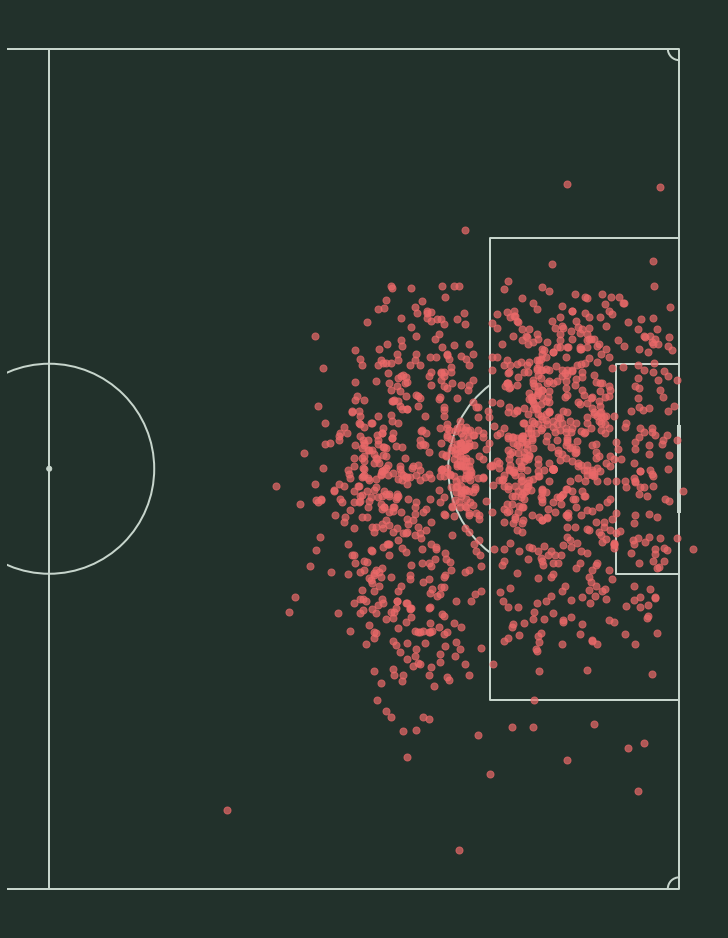

In [196]:
fig, ax = plt.subplots(figsize=(13*2,8.5*2))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#The statsbomb pitch from mplsoccer
pitch = mplsoccer.Pitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc',half=True,corner_arcs=True)

pitch.draw(ax=ax)

#I invert the axis to make it so I am viewing it how I want
plt.gca().invert_yaxis()

#plot the points, you can use a for loop to plot the different outcomes if you want

plt.scatter(df['X'],df['Y'], s=50,c='#ea6969',alpha=.7)



# **ده اخر جدول موجود في الموقع اللي موجود فيه اللاعب عمل ايه في كل ماتش لعبه**

In [178]:
def get_matches_data(player_id):
    strings = scripts[4].string
    ind_start = strings.index("('")+2
    ind_end = strings.index("')")
    json_data = strings[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    json_data = json.loads(json_data)
    goals=[]
    shots=[]
    xg=[]
    time_played=[]
    postion=[]
    h_team=[]
    a_team=[]
    season=[]
    dates = []
    xA = []
    assists = []
    key_passes = []
    npg = []
    npxG = []
    xGChain = []
    xGBuildup = []
    for i in range(len(json_data)):
        goals.append((json_data[i]['goals']))
        shots.append((json_data[i]['shots']))
        xg.append(json_data[i]['xG'])
        time_played.append(json_data[i]['time'])
        postion.append(json_data[i]['position'])
        h_team.append(json_data[i]['h_team'])
        a_team.append(json_data[i]['a_team'])
        season.append(json_data[i]['season'])
        dates.append(json_data[i]['date'])
        xA.append(json_data[i]['xA'])
        assists.append((json_data[i]['assists']))
        key_passes.append(json_data[i]['key_passes'])
        npg.append(json_data[i]['npg'])
        npxG.append(json_data[i]['npxG'])
        xGChain.append(json_data[i]['xGChain'])
        xGBuildup.append(json_data[i]['xGBuildup'])

    df = pd.DataFrame({'Position':postion, 'Home team':h_team, 'Away team':a_team, 'Season':season,
                                'Date':dates,'goals Scored':goals,'Non-penalty goals':npg,'Assists':assists,
                                 'shots':shots,'Key passes':key_passes,'Time played':time_played, 'xG':xg,
                                   'xA':xA,'Non-penalty xG':npxG,'xG Chain':xGChain, 'xG Buildup':xGBuildup})

    for col in list(df.columns)[11:]:
        df[col] = df[col].astype(float).round(3)
    
    for col in list(df.columns)[5:11]:
        df[col] = df[col].astype(int)
        
    return df

x = get_matches_data(player_id)
display(x)

,Position,Home team,Away team,Season,Date,goals Scored,Non-penalty goals,Assists,shots,Key passes,Time played,xG,xA,Non-penalty xG,xG Chain,xG Buildup
0,FW,Clermont Foot,Paris Saint Germain,2022,2022-08-06,2,2,1,6,4,90,1.992,0.915,1.992,2.920,0.606
1,AMC,Paris Saint Germain,Metz,2021,2022-05-21,0,0,1,3,4,90,0.269,0.535,0.269,2.063,1.636
2,FW,Montpellier,Paris Saint Germain,2021,2022-05-14,2,2,0,6,4,90,1.207,0.379,1.207,1.525,0.147
3,AMC,Paris Saint Germain,Troyes,2021,2022-05-08,0,0,0,6,1,90,0.420,0.015,0.420,0.418,0.060
4,FWR,Strasbourg,Paris Saint Germain,2021,2022-04-29,0,0,0,3,0,90,0.206,0.000,0.206,0.757,0.603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,FW,Malaga,Barcelona,2014,2014-09-24,0,0,0,2,1,90,0.163,0.059,0.163,0.263,0.156
266,FW,Levante,Barcelona,2014,2014-09-21,1,1,2,3,5,90,1.237,1.275,0.493,2.631,0.914
267,FW,Barcelona,Athletic Club,2014,2014-09-13,0,0,2,2,6,90,0.141,1.624,0.141,1.978,1.439
268,FW,Villarreal,Barcelona,2014,2014-08-31,0,0,0,8,4,90,0.920,0.258,0.920,1.061,0.290


# **معلومات في المختصر**

In [179]:
def player_against_team(team,get_matches_data):
    df = get_matches_data
    df = df.loc[(df['Away team'] == team) | (df['Home team']== team)].reset_index(drop=True)
    print(f"{player_name} stats Against {team} :")
    print("*   Time played: {} minutes in {} matches ".format((df['Time played'].sum()),len(df['Time played'])))
    print("*   Goals scored: {} Goals and {} assists ".format((df['goals Scored'].sum()),int(df['Assists'].sum())))
    print("*   Expected Goals: {} XG and {} XA ".format(df['xG'].sum().round(3),df['xA'].sum().round(3)))
    print("*   Shots: {} Shots ".format(int(df['shots'].sum())))
    print("*   Key passes: {} Key passes ".format(int(df['Key passes'].sum())))
    display(df)

player_against_team('',x)

Lionel Messi stats Against  :
*   Time played: 0 minutes in 0 matches 
*   Goals scored: 0 Goals and 0 assists 
*   Expected Goals: 0.0 XG and 0.0 XA 
*   Shots: 0 Shots 
*   Key passes: 0 Key passes 


,Position,Home team,Away team,Season,Date,goals Scored,Non-penalty goals,Assists,shots,Key passes,Time played,xG,xA,Non-penalty xG,xG Chain,xG Buildup
